# Uniswap v2 single transaction #

## n = 2 ##
## without fee ##

Invariant: $xy = L^2$

x - underlying asset

$P = \frac{x}{y}$ before the transaction

$P' = \frac{x'}{y'} = kP$ after the transaction

$x = L\sqrt{P}$

$y = \frac{L}{\sqrt{P}}$

In the pool: $V_1 = x' + y'P'$

Outside the pool: $V_{held} = x + yP'$

$IL(k) = \frac{V_1 - V_{held}}{V_{held}} = \frac{V_1}{V_{held}} - 1$

$IL(k) = \frac{2x'}{x(k+1)} - 1 = \frac{2L\sqrt{Pk}}{L\sqrt{P}(k+1)} - 1 = \frac{2\sqrt{k}}{k+1} - 1$

## $n \geqslant{3}$ ##
## without fee ##

Invariant: $x_1x_2...x_n = L^n$

$x_1$ - underlying asset

Transaction: $x_i <-> x_j$

$i,j \neq 1, i < j$

$P'_{x_ix_j} = \frac{x_i}{x_j} = k\frac{x_i'}{x_j'} = kP_{x_ix_j}$

Before the transaction:

$P_{x_1x_l} = \frac{x_1}{x_l}, l = \overline{2,n}$ 

After the transaction:

$P'_{x_1x_j} = \frac{x_1}{x'_j} = \sqrt{k}P_{x_1x_j}$ 

$P'_{x_1x_i} = \frac{x_1}{x'_i} = \frac{1}{\sqrt{k}}P_{x_1x_i}$ 

$P'_{x_1x_l} = \frac{x_1}{x_l} = P_{x_1x_l}, l \neq i,j$

In the pool: $V_1 = x'_1 + \sum\limits_{l=2}^{n} x'_lP'_{x_1x_l}$

$V_1 = x'_1 + \sum\limits_{l=2}^{n} x'_lP'_{x_1x_l} = nx'_1 = nx_1$

Outside the pool: $V_{held} = x_1 + \sum\limits_{l=2}^{n} x_lP'_{x_1x_l}$

$V_{held} = x_1 + \sum\limits_{l=2, l \neq i, j}^{n} x_lP_{x_1x_l} + x_i\frac{1}{\sqrt{k}}P_{x_1x_i} + x_j\sqrt{k}P_{x_1x_j}$

$V_{held} = x_1(\sqrt{k} + \frac{1}{\sqrt{k}} + (n-2))$

$IL(k) = \frac{V_1 - V_{held}}{V_{held}} = \frac{V_1}{V_{held}} - 1$

$IL(n, k) = \frac{nx_1}{x_1(\sqrt{k} + \frac{1}{\sqrt{k}} + (n-2))} - 1 = \frac{n\sqrt{k}}{(k + \sqrt{k}(n-2) + 1)} - 1$



## The transaction with underlying asset ##

$x_1$ - underlying asset

Transaction: $x_1 <-> x_l, l = \overline{2,n}$

$P'_{x_1x_l} = \frac{x'_1}{x'_l} = k\frac{x_1}{x_l} = kP_{x_1x_l}$

$x'_1 = \sqrt{k}x_1$

Before the transaction:

$P_{x_1x_j} = \frac{x_1}{x_j}, j = \overline{2,n}$ 

After the transaction:

$P'_{x_1x_j} = \frac{x'_1}{x_j} = \sqrt{k}P_{x_1x_j}, j \neq l$ 

$P'_{x_1x_l} = \frac{x'_1}{x'_l} = kP_{x_1x_l}$

In the pool: $V_1 = x'_1 + \sum\limits_{j=2}^{n} x'_jP'_{x_1x_j}$

$V_1 = nx'_1 = nx_1\sqrt{k}$

Outside the pool: $V_{held} = x_1 + \sum\limits_{j=2}^{n} x_jP'_{x_1x_j}$

$V_{held} = x_1 + \sum\limits_{j=2, j \neq l}^{n} x_jP_{x_1x_j}\sqrt{k} + x_lP_{x_1x_l}k$

$V_{held} = x_1(k + \sqrt{k}(n-2) + 1)$

$IL(k) = \frac{V_1 - V_{held}}{V_{held}} = \frac{V_1}{V_{held}} - 1$

$IL(n, k) = \frac{nx_1\sqrt{k}}{x_1(k + \sqrt{k}(n-2) + 1)} - 1 = \frac{n\sqrt{k}}{(k + \sqrt{k}(n-2) + 1)} - 1$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def IL_uni2(n, k):
    return ((n*np.sqrt(k))/(k+(n-2)*np.sqrt(k) + 1)) - 1

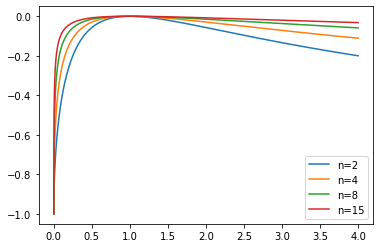

In [3]:
k = np.linspace(0, 4, 1000)
n = [2, 4, 8, 15]
for j in n:
    plt.plot(k, IL_uni2(j, k), label = 'n=%s'%j)
plt.legend()
plt.show()

In [4]:
np.where(IL_uni2(2, k) > IL_uni2(4, k))

(array([], dtype=int64),)

## n = 2 ##
## with fee $\rho$ ##

Invariant: $xy = L^2$

x - underlying asset

$P = \frac{x}{y}$ before the transaction

$P' = \frac{x''}{y'} = kP$ after the transaction

$x'' = x' - (x'-x)\rho = \sqrt{k}x, k > 1$

$y' = \frac{1}{\sqrt{k}}y$

In the pool: $V_1 = x' + y'P'$

$V_1 = \frac{x'' - x\rho}{1 - \rho} + y'P'$

$V_1 = x\sqrt{k}(1 + \frac{1}{1 - \rho}) - \frac{x\rho}{1 - \rho}$

$V_1 = x\sqrt{k}(\frac{2 - \rho}{1 - \rho}) - \frac{x\rho}{1 - \rho}$

Outside the pool: $V_{held} = x + yP'$

$V_{held} = x(k+1)$

$IL(k) = \frac{V_1 - V_{held}}{V_{held}} = \frac{V_1}{V_{held}} - 1$

$IL(\rho, k) = \frac{\sqrt{k}(2 - \rho) - \rho}{(1-\rho)(k+1)} - 1, k > 1$



$P' = \frac{x'}{y''} = kP$ after the transaction

$y'' = y' - (y'-y)\rho = \frac{1}{\sqrt{k}}y, k < 1$

$x' = \sqrt{k}x$

In the pool: $V_1 = x' + y'P'$

$V_1 = x' + \frac{y'' - y\rho}{1 - \rho}P'$

$V_1 = x\sqrt{k}(1 + \frac{1}{1 - \rho}) - \frac{xk\rho}{1 - \rho}$

$V_1 = x\sqrt{k}(\frac{2 - \rho}{1 - \rho}) - \frac{xk\rho}{1 - \rho}$

Outside the pool: $V_{held} = x + yP'$

$V_{held} = x(k+1)$

$IL(k) = \frac{V_1 - V_{held}}{V_{held}} = \frac{V_1}{V_{held}} - 1$

$IL(\rho, k) = \frac{\sqrt{k}(2 - \rho) - k\rho}{(1-\rho)(k+1)} - 1, k < 1$



## $n \geqslant{3}$ ##
## with fee $\rho$ ##

Invariant: $x_1x_2...x_n = L^n$

$x_1$ - underlying asset

Transaction: $x_i <->  x_j$

$i,j \neq 1, i < j$

$P'_{x_ix_j} = \frac{x_i}{x_j} = k\frac{x_i''}{x_j'} = kP_{x_ix_j}$

$x_i'' = x_i' - (x_i'-x_i)\rho = \sqrt{k}x_i, k > 1$

Before the transaction:

$P_{x_1x_l} = \frac{x_1}{x_l}, l = \overline{2,n}$ 

After the transaction:

$P'_{x_1x_j} = \frac{x_1}{x'_j} = \sqrt{k}P_{x_1x_j}$ 

$P'_{x_1x_i} = \frac{x_1}{x''_i} = \frac{1}{\sqrt{k}}P_{x_1x_i}$ 

$P'_{x_1x_l} = \frac{x_1}{x_l} = P_{x_1x_l}, l \neq i,j$

In the pool: $V_1 = x'_1 + \sum\limits_{l=2}^{n} x'_lP'_{x_1x_l}$

$V_1 = x'_1 + \sum\limits_{l=2, l \neq i}^{n} x'_lP'_{x_1x_l} + \frac{x_i'' - x_i\rho}{1 - \rho}P'_{x_1x_i}= (n - 1 + \frac{1}{1 - \rho})x_1 - \frac{\rho}{\sqrt{k}(1 - \rho)}x_1$

$V_1 = \frac{(n - 1)(1 - \rho) + 1}{1 - \rho}x_1 - \frac{\rho}{\sqrt{k}(1 - \rho)}x_1$

Outside the pool: $V_{held} = x_1 + \sum\limits_{l=2}^{n} x_lP'_{x_1x_l}$

$V_{held} = x_1 + \sum\limits_{l=2, l \neq i, j}^{n} x_lP_{x_1x_l} + x_i\frac{1}{\sqrt{k}}P_{x_1x_i} + x_j\sqrt{k}P_{x_1x_j}$

$V_{held} = x_1(\sqrt{k} + \frac{1}{\sqrt{k}} + (n-2))$

$IL(k) = \frac{V_1 - V_{held}}{V_{held}} = \frac{V_1}{V_{held}} - 1$

$IL(n, \rho, k) = \frac{\sqrt{k}((n-1)(1 - \rho) + 1) - \rho}{(1 - \rho)(k + (n-2)\sqrt{k} + 1)} - 1 = \frac{\sqrt{k}(n - (n-1)\rho) - \rho}{(1 - \rho)(k + (n-2)\sqrt{k} + 1)} - 1, k > 1$


If $x'_i = \sqrt{k}x_i, k < 1$

$x''_j = x'_j - (x'_j - x_j)\rho = \frac{1}{\sqrt{k}}x_j$,

Then $V_1 = x'_1 + \sum\limits_{l=2, l \neq j}^{n} x'_lP'_{x_1x_l} + \frac{x_j'' - x_j\rho}{1 - \rho}P'_{x_1x_j}= (n - 1 + \frac{1}{1 - \rho})x_1 - \frac{\sqrt{k}\rho}{(1 - \rho)}x_1$

$V_1 = \frac{(n - 1)(1 - \rho) + 1}{1 - \rho}x_1 - \frac{\sqrt{k}\rho}{(1 - \rho)}x_1$

$V_{held} = x_1(\sqrt{k} + \frac{1}{\sqrt{k}} + (n-2))$

$IL(n, \rho, k) = \frac{\sqrt{k}((n-1)(1 - \rho) + 1) - k\rho}{(1 - \rho)(k + (n-2)\sqrt{k} + 1)} - 1 = \frac{\sqrt{k}(n - (n - 1)\rho) - k\rho}{(1 - \rho)(k + (n-2)\sqrt{k} + 1)} - 1, k < 1$

## The transaction with underlying asset ##

$x_1$ - underlying asset

Transaction: $x_1 <-> x_l, l = \overline{2,n}$

$P'_{x_1x_l} = \frac{x'_1}{x''_l} = k\frac{x_1}{x_l} = kP_{x_1x_l}$

$x'_1 = \sqrt{k}x_1, k < 1$

$x''_l = x'_l - (x'_l - x_l)\rho = \frac{1}{\sqrt{k}}x_l$

Before the transaction:

$P_{x_1x_j} = \frac{x_1}{x_j}, j = \overline{2,n}$ 

After the transaction:

$P'_{x_1x_j} = \frac{x'_1}{x_j} = \sqrt{k}P_{x_1x_j}, j \neq l$ 

$P'_{x_1x_l} = \frac{x'_1}{x''_l} = kP_{x_1x_l}$

In the pool: $V_1 = x'_1 + \sum\limits_{j=2}^{n} x'_jP'_{x_1x_j}$

$V_1 = x'_1 + \sum\limits_{j=2, j \neq l}^{n} x'_jP'_{x_1x_j} + \frac{x''_l - x_l\rho}{1 - \rho}P'_{x_1x_l}$

$V_1 = x_1\sqrt{k}(n - 1 + \frac{1}{1 - \rho}) + \frac{kx_1\rho}{1 - \rho}$

Outside the pool: $V_{held} = x_1 + \sum\limits_{j=2}^{n} x_jP'_{x_1x_j}$

$V_{held} = x_1 + \sum\limits_{j=2, j \neq l}^{n} x_jP_{x_1x_j}\sqrt{k} + x_lP_{x_1x_l}k$

$V_{held} = x_1(k + \sqrt{k}(n-2) + 1)$

$IL(k) = \frac{V_1 - V_{held}}{V_{held}} = \frac{V_1}{V_{held}} - 1$

$IL(n, \rho, k) = \frac{\sqrt{k}((n-1)(1 - \rho) + 1) - k\rho}{(1 - \rho)(k + (n-2)\sqrt{k} + 1)} - 1 = \frac{\sqrt{k}(n - (n - 1)\rho) - k\rho}{(1 - \rho)(k + (n-2)\sqrt{k} + 1)} - 1, k < 1$


If $x'_l = \frac{1}{\sqrt{k}}x_l, k > 1$

$x''_1 = x'_1 - (x'_1 - x_1)\rho = \sqrt{k}x_1$,

Then $V_1 = \sum\limits_{j=2}^{n} x'_jP'_{x_1x_j} + \frac{x''_1 - x_1\rho}{1 - \rho}$

$V_1 = x_1\sqrt{k}(n - 1 + \frac{1}{1 - \rho}) + \frac{x_1\rho}{1 - \rho}$

$V_{held} = x_1(k + \sqrt{k}(n-2) + 1)$

$IL(n, \rho, k) = \frac{\sqrt{k}((n-1)(1 - \rho) + 1) - \rho}{(1 - \rho)(k + (n-2)\sqrt{k} + 1)} - 1 = \frac{\sqrt{k}(n - (n - 1)\rho) - \rho}{(1 - \rho)(k + (n-2)\sqrt{k} + 1)} - 1, k > 1$

IL $\geqslant{0}$:
$(1 - \rho)^2 \leqslant{k} \leqslant{(\frac{1}{1-\rho})^2}$

In [5]:
def IL_fee_uni2(n, k, r):
    if k >= 1:
        return ((np.sqrt(k)*(n - (n-1)*r) - r)/((1 - r)*(k+1 + np.sqrt(k)*(n-2)))) - 1
    elif k < 1:
        return ((np.sqrt(k)*(n - (n-1)*r) - r*k)/((1 - r)*(k+1 + np.sqrt(k)*(n-2)))) - 1

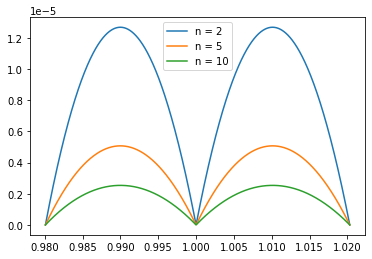

In [6]:
r = 0.01
kmin = (1-r)**2
kmax = 1/kmin
k = np.linspace(kmin, kmax, 1000)
for n in [2, 5, 10]:
    l = np.zeros(np.size(k))
    for i in range(0, np.size(k)):
        l[i] = IL_fee_uni2(n, k[i], r)
    plt.plot(k, l, label = 'n = %s'%n)

plt.legend()
plt.show()

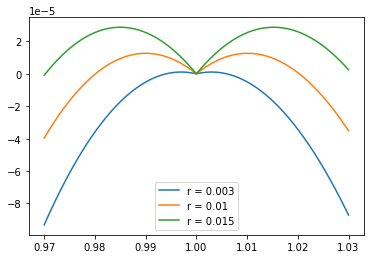

In [7]:
k = np.linspace(0.97, 1.03, 1000)
n = 2
for r in [0.003, 0.01, 0.015]:
    l = np.zeros(np.size(k))
    for i in range(0, np.size(k)):
        l[i] = IL_fee_uni2(n, k[i], r)
    plt.plot(k, l, label = 'r = %s'%r)

plt.legend()
plt.show()

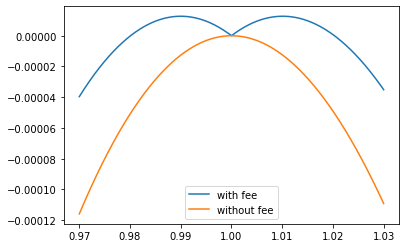

In [8]:
k = np.linspace(0.97, 1.03, 1000)
n = 2
r = 0.01
l = np.zeros(np.size(k))
for i in range(0, np.size(k)):
    l[i] = IL_fee_uni2(n, k[i], r)
plt.plot(k, l, label = 'with fee')
plt.plot(k, IL_uni2(n, k), label = 'without fee')
plt.legend()
plt.show()

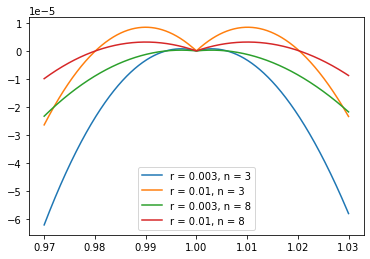

In [9]:
k = np.linspace(0.97, 1.03, 1000)
for n in [3, 8]:   
    for r in [0.003, 0.01]:
        l = np.zeros(np.size(k))
        for i in range(0, np.size(k)):
            l[i] = IL_fee_uni2(n, k[i], r)
        plt.plot(k, l, label = 'r = %s, n = %s'%(r,n))

plt.legend()
plt.show()

# Uniswap v3 single transaction #  

## n = 2 without fee ##

Invariant: $(x+Lc_1)(y+Lc_2)=L^2$

$x,y$ - real amount, $x,y \geqslant{0}$

If $x=0$, then $y_{virtual}=\frac{1}{c_1}$,
then $P=\frac{x_{virtual}}{y_{virtual}} = c_1^2$.

If $y=0$, then $x_{virtual}=c_2$,
then $P=\frac{x_{virtual}}{y_{virtual}} = \frac{1}{c_2^2}$.

Let $c_1^2 = p_a$,
$\frac{1}{c_2^2} = p_b$.

$c_1 = \sqrt{p_a}, c_2 = \frac{1}{\sqrt{p_b}}$

Invariant: $(x+L\sqrt{p_a})(y+\frac{L}{\sqrt{p_b}})=L^2$

For $n \geqslant{3}$

$x_1$ - underlying asset

$P_{x_1x_l} = \frac{x_1^{virtual}}{x_l^{virtual}}, l = \overline{2,n}$

Invariant: $\prod\limits_{i=1}^{n} (x_i+Lc_i)=L^n$

If $x_l=0, x_j^{virtual} = c_j, l \neq{1}, j \neq 1,l$, 

then $x_1^{virtual}=\frac{1}{\prod\limits_{i=2}^{n}c_i}$,
then $P_{x_1x_l}=\frac{x_1^{virtual}}{x_l^{virtual}} = \frac{1}{c_l\prod\limits_{i=2}^{n}c_i}$.

If $x_1=0, x_1^{virtual} = c_1, x_j^{virtual} = c_j, j \neq{l}$,

then $x_l^{virtual}=\frac{1}{\prod\limits_{i=1, i \neq l}^{n}c_i}$

$P_{x_1x_l} = \frac{x_1}{x_l} = c_1\prod\limits_{i=1, i \neq l}^{n}c_i$

$P_{x_1x_l} \in [p_a, p_b], l =\overline{2,n}$

$c_1 = c_2 = ... = c_n = c$, then $\frac{1}{c^n} = p_b$,  $c^n = p_a$

$c_1 = \sqrt[n]{p_a}, c_i = \frac{1}{\sqrt[n]{p_b}}, i = \overline{2,n}$

NB: If $\prod\limits_{i=1}^{n}(x_i+Lc_i)=L^n$, $c_1 \neq c_2 \neq ... \neq c_n$,

then $P_{x_1x_j} \in [c_1^2\prod\limits_{i=2,i\neq j}^{n}c_i; \frac{1}{c_j^2\prod\limits_{i=2,i\neq j}^{n} c_i}], j = \overline{2,n}$



## n = 2 ##
## without fee ##

Invariant: $(x + Lc_1)(y + Lc_2) = L^2$

x - underlying asset

$P = \frac{x^{virtual}}{y^{virtual}}$ before the transaction

$P' = \frac{x'^{virtual}}{y'^{virtual}} = kP$ after the transaction

$x = x^{virtual}-Lc_1$

$y = y^{virtual}-Lc_2$

$x'^{virtual} = \sqrt{k}x^{virtual}$

$y'^{virtual} = \frac{1}{\sqrt{k}}y^{virtual}$

In the pool: $V_1 = x' + y'P'$

$V_1 = x'^{virtual}-Lc_1 + (y'^{virtual}-Lc_2)P'$

$V_1 = 2x'^{virtual}-(Lc_1 + Lc_2Pk)$

$V_1 = 2\sqrt{k}x^{virtual}-(Lc_1 + Lc_2Pk)$

Outside the pool: $V_{held} = x + yP'$

$V_{held} = x^{virtual}-Lc_1 + (y^{virtual}-Lc_2)P'$

$V_{held} = x^{virtual}(k+1)-(Lc_1 + Lc_2Pk)$

$IL(k) = \frac{V_1 - V_{held}}{V_{held}}$

$IL(k) = \frac{2\sqrt{k}x^{virtual}-(Lc_1 + Lc_2Pk) - x^{virtual}(k+1)+(Lc_1 + Lc_2Pk)}{x^{virtual}(k+1)-(Lc_1 + Lc_2Pk)} = \frac{2\sqrt{k} - k -1}{k+1-\frac{(Lc_1 + Lc_2Pk)}{x^{virtual}}}$

$x^{virtual} = L\sqrt{P}$

$IL(c_1, c_2, P, k) = \frac{2\sqrt{k} - k -1}{k+1-\frac{(c_1 + c_2Pk)}{\sqrt{P}}}$

### $P' < p_a $ ###

$P' < p_a = \sqrt{c_1}$

$V_1 = y'P' = (y'^{virtual}-Lc_2)Pk = \frac{L}{\sqrt{p_a}}Pk - \frac{L}{\sqrt{p_b}}Pk$

$V_1 - V_{held} = \frac{L}{\sqrt{p_a}}Pk - \frac{L}{\sqrt{p_b}}Pk - L\sqrt{P}(k+1) + (L\sqrt{p_a} + \frac{L}{\sqrt{p_b}}Pk) = \frac{L}{\sqrt{p_a}}Pk - L\sqrt{P}(k+1) + L\sqrt{p_a}$


$IL(p_a, p_b, P, k) = \frac{\frac{L}{\sqrt{p_a}}Pk - L\sqrt{P}(k+1) + L\sqrt{p_a}}{L\sqrt{P}(k+1)-(L\sqrt{p_a} + L\frac{1}{\sqrt{p_b}}Pk)} = \frac{\frac{\sqrt{P}}{\sqrt{p_a}}k - (k+1) + \frac{\sqrt{p_a}}{\sqrt{P}}}{(k+1)-(\frac{\sqrt{p_a}}{\sqrt{P}} + \frac{\sqrt{P}}{\sqrt{p_b}}k)}$

$IL(p_a, p_b, P, k) = \frac{(\frac{\sqrt{P}}{\sqrt{p_a}} - 1)k - (1 - \frac{\sqrt{p_a}}{\sqrt{P}})}{(1-\frac{\sqrt{p_a}}{\sqrt{P}}) + k(1 - \frac{\sqrt{P}}{\sqrt{p_b}})}$

### $P' > p_b $ ###

$V_1 = L(\sqrt{p_b}-\sqrt{p_a})$

$V_1 - V_{held} = L(\sqrt{p_b}-\sqrt{p_a}) - L\sqrt{P}(k+1) + (L\sqrt{p_a} + \frac{L}{\sqrt{p_b}}Pk) = L\sqrt{p_b} - L\sqrt{P}(k+1) + \frac{L}{\sqrt{p_b}}Pk$

$IL(p_a, p_b, P, k) = \frac{L\sqrt{p_b} - L\sqrt{P}(k+1) + \frac{L}{\sqrt{p_b}}Pk}{L\sqrt{P}(k+1) - (L\sqrt{p_a} + \frac{L}{\sqrt{p_b}}Pk)} = \frac{(\frac{\sqrt{p_b}}{\sqrt{P}} - 1) - k(1 - \frac{\sqrt{P}}{\sqrt{p_b}})}{(1 - \frac{\sqrt{p_a}}{\sqrt{P}}) + k(1 - \frac{\sqrt{P}}{\sqrt{p_b}})}$

In [15]:
def IL2_uni3(k,P,c1,c2):
    
    a = c1/np.sqrt(P)
    b = c2*np.sqrt(P)
    d = (1 - a) + k*(1 - b)
    
    if k < a**2:
        c = (1/a - 1)*k - (1 - a)

    elif k > 1/(b**2):
        c = (1/b - 1) - k*(1 - b)
    
    elif (k>= a**2)&(k <= 1/(b**2)):
        c = 2*np.sqrt(k)- k - 1
    
    return c/d

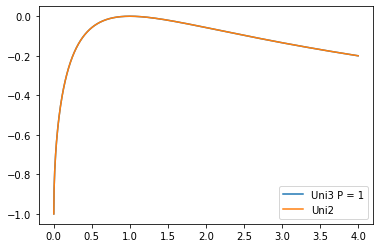

In [16]:
P = 1
pa = 0.00000000001 #k=pa/P
pb = 1/pa #k=pa/P
c1 = np.sqrt(pa)
c2 = 1/(np.sqrt(pb))
k = np.linspace(0, 4, 1000)
l = np.zeros(np.size(k))
for i in range(np.size(k)):
    l[i] = IL2_uni3(k[i], P, c1, c2)
plt.plot(k,l, label = 'Uni3 P = %s'%P)
plt.plot(k, IL_uni2(2, k), label = 'Uni2')
plt.legend()
plt.show()

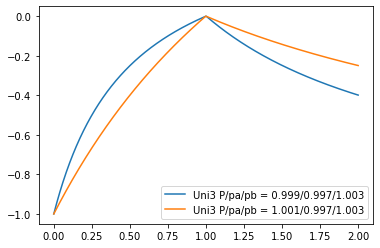

In [17]:
P = [0.999,1.001]
pa = 0.997 #k=pa/P
pb = 1.003 #k=pa/P
c1 = np.sqrt(pa)
c2 = 1/(np.sqrt(pb))

d = 0.25
k = np.linspace(0, 2, 1000)

for p in P:
    l = np.zeros(np.size(k))
    for i in range(np.size(k)):
        l[i] = IL2_uni3(k[i], p, c1, c2)
    plt.plot(k,l, label = 'Uni3 P/pa/pb = %s/%s/%s'%(p,pa, pb))


plt.legend()
plt.show()

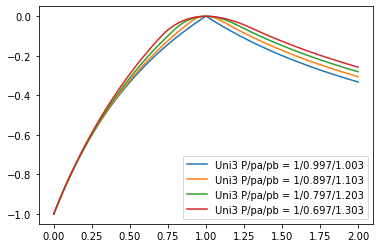

In [18]:
P = 1
pa = 0.997 #k=pa/P
pb = 1.003 #k=pa/P
c1 = np.sqrt(pa)
c2 = 1/(np.sqrt(pb))

d = 0.1
k = np.linspace(0, 2, 1000)
num=4

for t in range(num):
    l = np.zeros(np.size(k))
    for i in range(np.size(k)):
        l[i] = IL2_uni3(k[i], P, c1, c2)
    plt.plot(k,l, label = 'Uni3 P/pa/pb = %s/%s/%s'%(round(P,3),round(pa,3), round(pb,3)))
    pa -= d
    pb+= d
    c1 = np.sqrt(pa)
    c2 = 1/(np.sqrt(pb))


plt.legend()
plt.show()

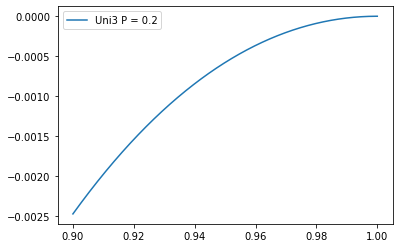

In [20]:
P = [0.2]
pa = 0.1 #k=pa/P
pb = 1/pa #k=pa/P
c1 = np.sqrt(pa)
c2 = 1/(np.sqrt(pb))

d = 0.25
k = np.linspace(0.9, 1, 1000)

for p in P:
    l = np.zeros(np.size(k))
    for i in range(np.size(k)):
        l[i] = IL2_uni3(k[i], p, c1, c2)
    plt.plot(k,l, label = 'Uni3 P = %s'%p)


plt.legend()
plt.show()

In [40]:
def IL2_uni3(k,P,pa,pb, r): #для удобства изменяю входные параметры
    
    '''a = c1/np.sqrt(P)
    b = c2*np.sqrt(P)
    d = (1 - a) + k*(1 - b)
    
    if k < a**2:
        c = (1/a - 1)*k - (1 - a)

    elif k > 1/(b**2):
        c = (1/b - 1) - k*(1 - b)
    
    elif (k>= a**2)&(k <= 1/(b**2)):
        c = 2*np.sqrt(k)- k - 1
    '''    
    d = (1-r)*(np.sqrt(P)*(np.sqrt(k) + 1/np.sqrt(k)) - (P*np.sqrt(k/pb) + np.sqrt(pa/k)))
    if k*P > pb:
        c = np.sqrt(P/k)*(np.sqrt(pb/P) - r) - (1-r)*np.sqrt(pa/k)
    elif k*P < pa:
        c = P*np.sqrt(k/pa)*(1 - r*np.sqrt(pa/P)) - (1-r)*P*np.sqrt(k/pb)
    else:
        c = np.sqrt(P)*(2 - r - r*np.sqrt(k)*bool(k<1) - r*bool(k>=1)/np.sqrt(k))- (1-r)*(np.sqrt(pa/k) + P*np.sqrt(k/pb))
    return c/d - 1

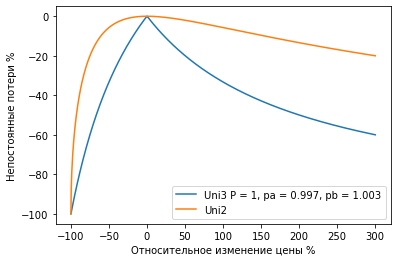

In [41]:
P = 1
pa = 0.997 #k=pa/P
pb = 1/pa #k=pa/P
c1 = np.sqrt(pa)
c2 = 1/(np.sqrt(pb))
k = np.linspace(0.000000001, 4, 1000)
l = np.zeros(np.size(k))
for i in range(np.size(k)):
    l[i] = IL2_uni3(k[i],P,pa,pb, 0)
plt.plot(100*(k-1),l*100, label = 'Uni3 P = %s, pa = %s, pb = %s'%(P, 0.997, 1.003))
plt.plot((k-1)*100, IL_uni2(2, k)*100, label = 'Uni2')
plt.legend()
plt.xlabel('Относительное изменение цены %')
plt.ylabel('Непостоянные потери %')
plt.show()

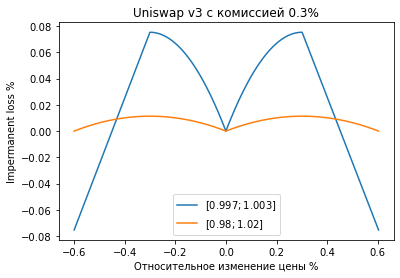

In [43]:
P = 1
pa = 0.997 #k=pa/P
pb = 1/pa #k=pa/P
c1 = np.sqrt(pa)
c2 = 1/(np.sqrt(pb))
r = 0.003

d = 0.017
k = np.linspace(min(np.sqrt((pa)/P)*(1-r), (1-r)**2), max(np.sqrt((pb)*P)/(1-r), 1/(1-r)**2), 1000)
#k = np.linspace(0.99, 1.01, 1000)
num=2

for t in range(num):
    l = np.zeros(np.size(k))
    for i in range(np.size(k)):
        l[i] = IL2_uni3(k[i],P,pa,pb, r)
        #l[i] = IL2_uni3(k[i], P, c1, c2)
    plt.plot((k-1)*100,l*100, label = '$[%s;%s]$'%(round(pa,3), round(pb,3)))
    pa -= d
    pb+= d
    c1 = np.sqrt(pa)
    c2 = 1/(np.sqrt(pb))

plt.ylabel('Impermanent loss %')
plt.xlabel('Относительное изменение цены %')
plt.legend()
plt.title('Uniswap v3 с комиссией 0.3%')
plt.show()

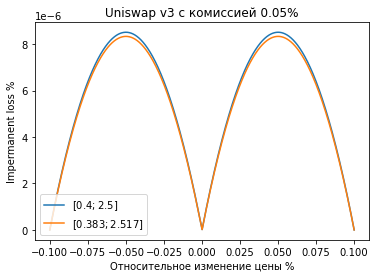

In [45]:
P = 1
pa = 0.4 #k=pa/P
pb = 1/pa #k=pa/P
c1 = np.sqrt(pa)
c2 = 1/(np.sqrt(pb))
r = 0.0005

d = 0.017
k = np.linspace(max(np.sqrt((pa)/P)*(1-r), 1/(1-r)**2), min(np.sqrt((pb)*P)/(1-r), (1-r)**2), 1000)
num=2

for t in range(num):
    l = np.zeros(np.size(k))
    for i in range(np.size(k)):
        #l[i] = IL2_fee_uni3(k[i], P, c1, c2, r)*100
        l[i] = IL2_uni3(k[i],P,pa,pb, r)*100
    plt.plot((1-k)*100,l, label = '$[%s;%s]$'%(round(pa,3), round(pb,3)))
    pa -= d
    pb+= d
    c1 = np.sqrt(pa)
    c2 = 1/(np.sqrt(pb))

plt.title('Uniswap v3 c комиссией 0.05%')
plt.ylabel('Impermanent loss %')
plt.xlabel('Относительное изменение цены %')
plt.legend()
plt.show()

## n = 2 ##
## with fee $\rho$ ##

Invariant: $(x + Lc_1)(y + Lc_2) = L^2$

x - underlying asset

### $P' \in [p_a, p_b]$ ###

$P = \frac{x^{virtual}}{y^{virtual}}$ before the transaction

$P' = \frac{x''^{virtual}}{y'^{virtual}} = kP$ after the transaction

$x = x^{virtual}-Lc_1$

$y = y^{virtual}-Lc_2$

$x''^{virtual} = \sqrt{k}x^{virtual} = x'^{virtual} - (x'^{virtual} - x^{virtual})\rho,k > 1$

$y'^{virtual} = \frac{1}{\sqrt{k}}y^{virtual}$

In the pool: $V_1 = x' + y'P'$

$V_1 = \frac{(x''^{virtual} - x^{virtual}\rho)}{1-\rho}-Lc_1 + (y'^{virtual}-Lc_2)Pk$

$V_1 = x''^{virtual}(\frac{2 - \rho}{1-\rho}) - \frac{x^{virtual}\rho}{1-\rho} -(Lc_1 + Lc_2Pk)$

$V_1 = \sqrt{k}x^{virtual}(\frac{2 - \rho}{1-\rho}) -\frac{x^{virtual}\rho}{1-\rho}-(Lc_1 + Lc_2Pk)$

Outside the pool: $V_{held} = x + yP'$

$V_{held} = x^{virtual}-Lc_1 + (y^{virtual}-Lc_2)Pk$

$V_{held} = x^{virtual}(k+1)-(Lc_1 + Lc_2Pk)$

$IL(k) = \frac{V_1 - V_{held}}{V_{held}}$

$IL(k) = \frac{\sqrt{k}x^{virtual}(\frac{2 - \rho}{1-\rho}) -\frac{x^{virtual}\rho}{1-\rho}-(Lc_1 + Lc_2Pk) - x^{virtual}(k+1)+(Lc_1 + Lc_2Pk)}{x^{virtual}(k+1)-(Lc_1 + Lc_2Pk)} = \frac{\sqrt{k}x^{virtual}(\frac{2 - \rho}{1-\rho}) -\frac{x^{virtual}\rho}{1-\rho} - x^{virtual}(k+1)}{ x^{virtual}(k+1) -(Lc_1 + Lc_2Pk)}$

$IL(k) = \frac{\sqrt{k}(2 - \rho)- \rho - (k+1)(1-\rho)}{(1-\rho)(k+1 -\frac{(Lc_1 + Lc_2Pk)}{x^{virtual}})}$

$x^{virtual} = L\sqrt{P}$

$IL(\rho, c_1, c_2, P, k) = \frac{\sqrt{k}(2 - \rho)- k- 1 + k\rho}{(1-\rho)(k+1-\frac{(c_1 + c_2Pk)}{\sqrt{P}})}, k > 1$

$IL(\rho, c_1, c_2, P, k) = \frac{\sqrt{k}(2 - \rho)- k-1+\rho}{(1-\rho)(k+1-\frac{(c_1 + c_2Pk)}{\sqrt{P}})}, k < 1$

### $P' > p_b$ ###

If $P' > p_b, c_1 = \sqrt{p_a}, c_2 = \frac{1}{\sqrt{p_b}}$, then

$V_1 = \frac{(x''^{virtual} - x^{virtual}\rho)}{1-\rho}-L\sqrt{p_a} = \frac{L(\sqrt{p_b} - \sqrt{P}\rho)}{1-\rho}-L\sqrt{p_a}$

$V_1 = \frac{L(\sqrt{p_b}- \sqrt{P}\rho) - L\sqrt{p_a}(1-\rho)}{1-\rho}$

$IL(\rho, p_a, p_b, P, k) = \frac{L(\sqrt{p_b}- \sqrt{P}\rho)- L\sqrt{P}(k+1)(1-\rho) + L\frac{1}{\sqrt{p_b}}Pk(1-\rho)}{(1-\rho)(L\sqrt{P}(k+1)-(L\sqrt{p_a} + L\frac{1}{\sqrt{p_b}}Pk))} = \frac{(\sqrt{\frac{p_b}{P}} - \rho) - (k + 1)(1-\rho) + \frac{\frac{1}{\sqrt{p_b}}Pk(1-\rho)}{\sqrt{P}}}{(1-\rho)(k+1-\frac{(\sqrt{p_a} + \frac{1}{\sqrt{p_b}}Pk)}{\sqrt{P}})} = \frac{\sqrt{\frac{p_b}{P}} - 1 - k(1-\rho)(1 - \frac{P}{\sqrt{p_b}})}{(1-\rho)(k+1-\frac{\sqrt{p_a}}{\sqrt{P}} - \frac{k\sqrt{P}}{\sqrt{p_b}})}$

$IL(\rho, c_1, c_2, P, k) = \frac{ \frac{1}{\sqrt{P}c_2} - 1 - k(1-\rho)(1 - \sqrt{P}c_2)}{ (1-\rho)(k+1-\frac{c_1}{\sqrt{P}} - k\sqrt{P}c_2)}$

### $P' < p_a$ ###

If $P' < p_a, c_1 = \sqrt{p_a}, c_2 = \frac{1}{\sqrt{p_b}}$, then

$V_1 = (\frac{(y''^{virtual} - y^{virtual}\rho)}{1-\rho}-\frac{L}{\sqrt{p_b}})Pk = (\frac{L(\frac{1}{\sqrt{p_a}} - \frac{\rho}{\sqrt{P}})}{1-\rho}-\frac{L}{\sqrt{p_b}})Pk = \frac{ L(\frac{1}{\sqrt{p_a}} - \frac{\rho}{\sqrt{P}}) -\frac{L(1-\rho)}{\sqrt{p_b}}}{1-\rho}Pk$

$IL(\rho, p_a, p_b, P, k) = \frac{  L(\frac{1}{\sqrt{p_a}} - \frac{\rho}{\sqrt{P}})Pk -\frac{L(1-\rho)}{\sqrt{p_b}}Pk - L\sqrt{P}(k+1)(1-\rho)+(L\sqrt{p_a} + L\frac{1}{\sqrt{p_b}}Pk)(1-\rho)   }{(1-\rho)(L\sqrt{P}(k+1)-(L\sqrt{p_a} + L\frac{1}{\sqrt{p_b}}Pk))} = \frac{  L(\frac{1}{\sqrt{p_a}} - \frac{\rho}{\sqrt{P}})Pk - L\sqrt{P}(k+1)(1-\rho)+L\sqrt{p_a}(1-\rho)   }{(1-\rho)(L\sqrt{P}(k+1)-(L\sqrt{p_a} + L\frac{1}{\sqrt{p_b}}Pk))}$

$IL(\rho, p_a, p_b, P, k) = \frac{(\frac{\sqrt{P}}{\sqrt{p_a}} - \rho)k - (k+1)(1-\rho)+ \frac{\sqrt{p_a}(1-\rho)}{\sqrt{P}}}{(1-\rho)(k+1-(\frac{\sqrt{p_a}}{\sqrt{P}} + \frac{\sqrt{P}}{\sqrt{p_b}}k))} = \frac{(\frac{\sqrt{P}}{\sqrt{p_a}} - 1)k - (1 - \rho)(1 - \frac{\sqrt{p_a}}{\sqrt{P}})}{(1-\rho)(k+1-(\frac{\sqrt{p_a}}{\sqrt{P}} + \frac{\sqrt{P}}{\sqrt{p_b}}k))}$

$IL(\rho, c_1, c_2, P, k) =\frac{(\frac{\sqrt{P}}{c_1} - 1)k - (1 - \rho)(1 - \frac{c_1}{\sqrt{P}})}{(1-\rho)(k+1-(\frac{c_1}{\sqrt{P}} + \sqrt{P}c_2k))}$

$ (1 - \rho)^2 \leqslant k \leqslant \frac{1}{(1-\rho)^2},  P' \in [p_a, p_b]: IL \geqslant {0} $

In [21]:
def IL2_fee_uni3(k,P,c1,c2,r):
    
    a = c1/np.sqrt(P)
    b = c2*np.sqrt(P)
    vheld = (1 - a) + k*(1 - b)
    
    if k < a**2:
        c = ((1/a - 1)*k) - ((1 - a)*(1-r))

    elif k > 1/(b**2):
        c = (1/b - 1) - (k*(1 - b)*(1-r))
    
    elif (k>= a**2)&(k <= 1/(b**2)):
        c = (2-r)*np.sqrt(k)- k - 1
        if k >= 1:
            c+= k*r
        elif k < 1:
            c+=r
    
    return c/((1-r)*vheld)

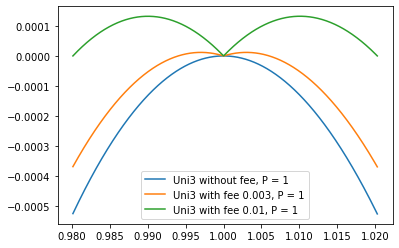

In [22]:
P = [1]
pa = 0.8 #k=pa/P
pb = 1.2 #k=pa/P
c1 = np.sqrt(pa)
c2 = 1/(np.sqrt(pb))
R = [0.003, 0.01]
rmax = max(R)
d = 0.25
k = np.linspace((1-rmax)**2, 1/((1-rmax)**2), 1000)

for p in P:
    
    m = np.zeros(np.size(k))
    for i in range(np.size(k)):
        m[i] = IL2_uni3(k[i], p, c1, c2)
    plt.plot(k,m, label = 'Uni3 without fee, P = %s'%p)
    
    for r in R:
        l = np.zeros(np.size(k))
        for i in range(np.size(k)):
            l[i] = IL2_fee_uni3(k[i], p, c1, c2, r)
        plt.plot(k,l, label = 'Uni3 with fee %s, P = %s'%(r,p))


plt.legend()
plt.show()

## $n \geqslant{3}$ ##
## without fee ##

$\prod\limits_{i=1}^{n}(x_i+Lc_i)=L^n$, $c_1 \neq c_2 \neq ... \neq c_n$,

$P_{x_1x_j} \in [c_1^2\prod\limits_{i=2,i\neq j}^{n}c_i; \frac{1}{c_j^2\prod\limits_{i=2,i\neq j}^{n} c_i}], j = \overline{2,n}$

$x_1$ - underlying asset

$P'_{x_ix_j} = kP_{x_ix_j} = k\frac{x_i^{virtual}}{x_j^{virtual}}, i < j$

$x_i^{'virtual} = \sqrt{k}x_i^{virtual}, x_j^{'virtual} = \frac{1}{\sqrt{k}}x_j^{virtual}$

$P_{x_1x_l} = \frac{x_1^{virtual}}{x_l^{virtual}}, l = \overline{2,n}$

$P'_{x_1x_l} = P_{x_1x_l}, l \neq i, j$

$P'_{x_1x_i} = \frac{1}{\sqrt{k}}P_{x_1x_i}$

$P'_{x_1x_j} =\sqrt{k}P_{x_1x_j}$

$V_1 = x_1^{'virtual} + \sum\limits_{l = 2}^{n}P'_{x_1x_l}x_l^{'virtual} - Lc_1 - \sum\limits_{l = 2}^{n}P'_{x_1x_l}Lc_l= nx_1^{virtual} - Lc_1 - \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}Lc_l - \sqrt{k}P_{x_1x_j}Lc_j - \frac{1}{\sqrt{k}}P_{x_1x_i}Lc_i$

$V_{held} = x_1^{virtual} + \sum\limits_{l = 2}^{n}P'_{x_1x_l}x_l^{virtual} - Lc_1 - \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}Lc_l - \sqrt{k}P_{x_1x_j}Lc_j - \frac{1}{\sqrt{k}}P_{x_1x_i}Lc_i$

$V_{held} = x_1^{virtual}((n-2) + \sqrt{k} +\frac{1}{\sqrt{k}}) - Lc_1 - \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}Lc_l - \sqrt{k}P_{x_1x_j}Lc_j - \frac{1}{\sqrt{k}}P_{x_1x_i}Lc_i$

$V_1 - V_{held} = nx_1^{virtual} - x_1^{virtual}((n-2) + \sqrt{k} +\frac{1}{\sqrt{k}})$

$IL = \frac{nx_1^{virtual} - x_1^{virtual}((n-2) + \sqrt{k} +\frac{1}{\sqrt{k}})}{x_1^{virtual}((n-2) + \sqrt{k} +\frac{1}{\sqrt{k}}) - Lc_1 - \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}Lc_l - \sqrt{k}P_{x_1x_j}Lc_j - \frac{1}{\sqrt{k}}P_{x_1x_i}Lc_i} = \frac{n\sqrt{k} - ((n-2)\sqrt{k} + k +1)}{((n-2)\sqrt{k} + k +1) - \frac{\sqrt{k}(Lc_1 + \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}Lc_l + \sqrt{k}P_{x_1x_j}Lc_j + \frac{1}{\sqrt{k}}P_{x_1x_i}Lc_i)}{x_1^{virtual}}}$

$x_1^{virtual} = L\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}$

$IL(n, c_1, ... c_n, P_{x_1x_2},..., P_{x_1x_n}, k) = \frac{n\sqrt{k} - ((n-2)\sqrt{k} + k +1)}{((n-2)\sqrt{k} + k +1) - \frac{\sqrt{k}(c_1 + \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}c_l + \sqrt{k}P_{x_1x_j}c_j + \frac{1}{\sqrt{k}}P_{x_1x_i}c_i)}{\sqrt[n]{\prod\limits_{l=2}^{n} P_{x_1x_l}}}}$

### Swap with underlying asset ###

$x_1 <-> x_j$

$P'_{x_1x_j} = kP_{x_1x_j}$

$x_1^{'virtual} = \sqrt{k}x_1^{virtual}$

$x_j^{'virtual} = \frac{1}{\sqrt{k}}x_j^{virtual}$

$P'_{x_1x_l} = \sqrt{k}P_{x_1x_l}, l \neq j$

$P'_{x_1x_j} = kP_{x_1x_j}$

$V_1 = x_1^{'virtual} + \sum\limits_{l = 2}^{n}P'_{x_1x_l}x_l^{'virtual} - Lc_1 - \sum\limits_{l = 2}^{n}P'_{x_1x_l}Lc_l= nx_1^{'virtual} - Lc_1 - \sum\limits_{l = 2, l \neq j}^{n}\sqrt{k}P_{x_1x_l}Lc_l - kP_{x_1x_j}Lc_j$

$V_{held} = x_1^{virtual}((n-2)\sqrt{k} + k +1) - Lc_1 - \sum\limits_{l = 2, l \neq j}^{n}\sqrt{k}P_{x_1x_l}Lc_l - kP_{x_1x_j}Lc_j$

$V_1 - V_{held} = nx_1^{'virtual} - x_1^{virtual}((n-2)\sqrt{k} + k +1)$

$IL = \frac{nx_1^{'virtual} - x_1^{virtual}((n-2)\sqrt{k} + k +1)}{x_1^{virtual}((n-2)\sqrt{k} + k +1) - Lc_1 - \sum\limits_{l = 2, l \neq j}^{n}\sqrt{k}P_{x_1x_l}Lc_l - kP_{x_1x_j}Lc_j} = \frac{n\sqrt{k} - ((n-2)\sqrt{k} + k +1)}{ ((n-2)\sqrt{k} + k +1) - \frac{Lc_1 + \sum\limits_{l = 2, l \neq j}^{n}\sqrt{k}P_{x_1x_l}Lc_l + kP_{x_1x_j}Lc_j}{x_1^{virtual}}}$


$x_1^{virtual} = L\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}$

$IL = \frac{nx_1^{'virtual} - x_1^{virtual}((n-2)\sqrt{k} + k +1)}{x_1^{virtual}((n-2)\sqrt{k} + k +1) - Lc_1 - \sum\limits_{l = 2, l \neq j}^{n}\sqrt{k}P_{x_1x_l}Lc_l - kP_{x_1x_j}Lc_j} = \frac{n\sqrt{k} - ((n-2)\sqrt{k} + k +1)}{ ((n-2)\sqrt{k} + k +1) - \frac{c_1 + \sum\limits_{l = 2, l \neq j}^{n}\sqrt{k}P_{x_1x_l}c_l + kP_{x_1x_j}c_j}{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}}}$

$IL(n, c_1, ... c_n, P_{x_1x_2},..., P_{x_1x_n}, k) = \frac{n\sqrt{k} - ((n-2)\sqrt{k} + k +1)}{ ((n-2)\sqrt{k} + k +1) - \frac{\sqrt{k}(\frac{c_1}{\sqrt{k}} + \sum\limits_{l = 2, l \neq j}^{n}P_{x_1x_l}c_l + \sqrt{k}P_{x_1x_j}c_j)}{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}} }}$

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import sys
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

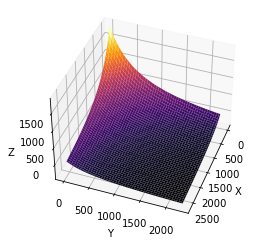

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax = fig.gca(projection='3d') # get current axis
L = 1000
c1 = 0.7
c2 = 0.6
c3 = 0.5

# метод meshgrid создает матрицу координат по векторам координат X, Y
X = np.arange(0, (L/(c2*c3)) - L*c1, 0.5)
Y = np.arange(0, (L/(c1*c3)) - L*c2, 0.5)
X, Y = np.meshgrid(X, Y)
Z = ((L**3)/((X+L*c1)*(Y+L*c2))) - L*c3

surf = ax.plot_surface(X, Y, Z, cmap = 'inferno')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(40, 20)

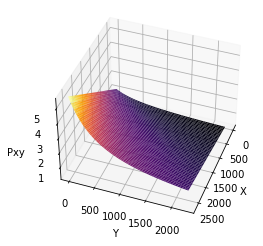

In [25]:
L = 1000
c1 = 0.7
c2 = 0.6
c3 = 0.5

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax = fig.gca(projection='3d') # get current axis

XX = np.arange(0, (L/(c2*c3)) - L*c1, 0.5)
YY = np.arange(0, (L/(c1*c3)) - L*c2, 0.5)
XX, YY = np.meshgrid(XX, YY)
ZZ = (XX + L*c1)/(YY + L*c2)

surf = ax.plot_surface(XX, YY, ZZ, cmap = 'inferno')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pxy')

ax.view_init(40, 20)

In [26]:
print(np.max(ZZ)) #1/(c2^2*c3)
print(np.min(ZZ)) #c1^2*c3

5.555
0.24501225061253062


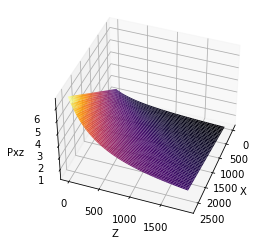

In [27]:
L = 1000
c1 = 0.7
c2 = 0.6
c3 = 0.5

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax = fig.gca(projection='3d') # get current axis

XX = np.arange(0, (L/(c2*c3)) - L*c1, 0.5)
ZZ = np.arange(0, (L/(c1*c2)) - L*c3, 0.5)
XX, ZZ = np.meshgrid(XX, ZZ)
YY = (XX + L*c1)/(ZZ + L*c3)

surf = ax.plot_surface(XX, ZZ, YY,cmap = 'inferno')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Pxz')

ax.view_init(40, 20)

In [28]:
print(np.max(YY)) #1/(c3^2*c2)
print(np.min(YY)) #c1^2*c2

6.666
0.29405587061541694


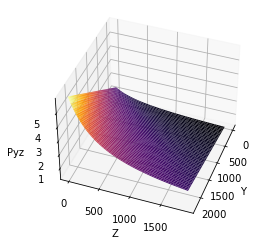

In [29]:
L = 1000
c1 = 0.7
c2 = 0.6
c3 = 0.5

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax = fig.gca(projection='3d') # get current axis

YY = np.arange(0, (L/(c1*c3)) - L*c2, 0.5)
ZZ = np.arange(0, (L/(c1*c2)) - L*c3, 0.5)
YY, ZZ = np.meshgrid(YY, ZZ)
XX = (YY + L*c1)/(ZZ + L*c3)

surf = ax.plot_surface(YY, ZZ, XX, cmap = 'inferno')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('Pyz')

ax.view_init(40, 20)

In [111]:
print(np.max(XX)) #1/(c3^2*c1)
print(np.min(XX)) #c2^2*c1

5.914
0.29405587061541694


## $n \geqslant{3}$ ##
## with fee $\rho $ ##

$i <-> j$

$x_i^{''virtual} = \sqrt{k}x_i^{virtual} = x_i^{'virtual} - (x_i^{'virtual} - x_i^{virtual})\rho,k > 1$

$x_j^{'virtual} = \frac{1}{\sqrt{k}}x_j^{virtual}$

$V_1 = x_1^{'virtual} + \sum\limits_{l = 2, l \neq i}^{n}P'_{x_1x_l}x_l^{'virtual} + P'_{x_1x_i}x_i^{'virtual}- Lc_1 - \sum\limits_{l = 2}^{n}P'_{x_1x_l}Lc_l = (n-1)x_1^{virtual} + \frac{1}{\sqrt{k}}P_{x_1x_i}\frac{x_i^{''virtual} - x_i^{virtual}\rho}{1-\rho} - Lc_1 - \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}Lc_l - \sqrt{k}P_{x_1x_j}Lc_j - \frac{1}{\sqrt{k}}P_{x_1x_i}Lc_i$

$V_1 = (n-1 + \frac{1}{1-\rho} - \frac{1}{\sqrt{k}}\frac{\rho}{1-\rho})x_1^{virtual} - Lc_1 - \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}Lc_l - \sqrt{k}P_{x_1x_j}Lc_j - \frac{1}{\sqrt{k}}P_{x_1x_i}Lc_i$

$V_{held} = x_1^{virtual}((n-2) + \sqrt{k} +\frac{1}{\sqrt{k}}) - Lc_1 - \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}Lc_l - \sqrt{k}P_{x_1x_j}Lc_j - \frac{1}{\sqrt{k}}P_{x_1x_i}Lc_i$

$V_1 - V_{held} = \frac{x_1^{virtual}((n-1)(1-\rho)\sqrt{k} + \sqrt{k} - \rho)}{(1-\rho)\sqrt{k}} - x_1^{virtual}\frac{((n-2)\sqrt{k} + k +1)(1-\rho)}{(1-\rho)\sqrt{k}}$

$IL = \frac{x_1^{virtual}((n-1)(1-\rho)\sqrt{k} + \sqrt{k} - \rho) - x_1^{virtual}((n-2)\sqrt{k} + k +1)(1-\rho)}{(1-\rho)\sqrt{k}(x_1^{virtual}((n-2) + \sqrt{k} +\frac{1}{\sqrt{k}}) - Lc_1 - \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}Lc_l - \sqrt{k}P_{x_1x_j}Lc_j - \frac{1}{\sqrt{k}}P_{x_1x_i}Lc_i)}$

$IL = \frac{(n-1)(1-\rho)\sqrt{k} + \sqrt{k} - \rho - (n-2)\sqrt{k}(1-\rho) - (k+1)(1-\rho)}{(1-\rho)((n-2)\sqrt{k} + k +1 - \frac{\sqrt{k}(Lc_1 + \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}Lc_l + \sqrt{k}P_{x_1x_j}Lc_j + \frac{1}{\sqrt{k}}P_{x_1x_i}Lc_i)}{x_1^{virtual}})}$

$IL = \frac{(2-\rho)\sqrt{k} - (k+1) + k\rho}{(1-\rho)((n-2)\sqrt{k} + k +1 - \frac{\sqrt{k}(Lc_1 + \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}Lc_l + \sqrt{k}P_{x_1x_j}Lc_j + \frac{1}{\sqrt{k}}P_{x_1x_i}Lc_i)}{x_1^{virtual}})}$

$x_1^{virtual} = L\sqrt[n]{\prod\limits_{i=2}^{n}P_{x_1x_i}}$

$IL(\rho, n, c_1, ... c_n, P_{x_1x_2},..., P_{x_1x_n}, k) = \frac{(2-\rho)\sqrt{k} - (k+1) + k\rho}{(1-\rho)((n-2)\sqrt{k} + k +1 - \frac{\sqrt{k}(c_1 + \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}c_l + \sqrt{k}P_{x_1x_j}c_j + \frac{1}{\sqrt{k}}P_{x_1x_i}c_i)}{\sqrt[n]{\prod\limits_{i=2}^{n}P_{x_1x_i}}})}, k > 1$

$IL(\rho, n, c_1, ... c_n, P_{x_1x_2},..., P_{x_1x_n}, k) = \frac{(2-\rho)\sqrt{k} - (k+1) + \rho}{(1-\rho)((n-2)\sqrt{k} + k +1 - \frac{\sqrt{k}(c_1 + \sum\limits_{l = 2, l \neq i, j}^{n}P_{x_1x_l}c_l + \sqrt{k}P_{x_1x_j}c_j + \frac{1}{\sqrt{k}}P_{x_1x_i}c_i)}{\sqrt[n]{\prod\limits_{i=2}^{n}P_{x_1x_i}}})}, k < 1$

### Swap $1 <-> j$ ###

$IL(\rho, n, c_1, ... c_n, P_{x_1x_2},..., P_{x_1x_n}, k) = \frac{(2-\rho)\sqrt{k} - (k+1) + k\rho}{(1-\rho)((n-2)\sqrt{k} + k +1 - \frac{\sqrt{k}(\frac{c_1}{\sqrt{k}} + \sum\limits_{l = 2, l \neq j}^{n}P_{x_1x_l}c_l + \sqrt{k}P_{x_1x_j}c_j)}{\sqrt[n]{\prod\limits_{i=2}^{n}P_{x_1x_i}}})}, k > 1$

$IL(\rho, n, c_1, ... c_n, P_{x_1x_2},..., P_{x_1x_n}, k) = \frac{(2-\rho)\sqrt{k} - (k+1) + \rho}{(1-\rho)((n-2)\sqrt{k} + k +1 - \frac{\sqrt{k}(\frac{c_1}{\sqrt{k}} + \sum\limits_{l = 2, l \neq j}^{n}P_{x_1x_l}c_l + \sqrt{k}P_{x_1x_j}c_j)}{\sqrt[n]{\prod\limits_{i=2}^{n}P_{x_1x_i}}})}, k < 1$

In [49]:
n = 1
r = np.zeros(n-1) #комиссии в парах
P = np.zeros(n) #курсы до swap
P[0] = 1 #Px1x1 для удобства
с = np.zeros(n) #ci
for i in range(n-1):
    r[i] = 0 
for i in range(n):
    с[i] = 0  

In [52]:
#i < j
#P'xixj = kPxixj, i < j

def IL_v3_fee_from3(r, n, c, P, k, i, j):
    C = 1
    for l in range(n):
         if(l!=i)&(l!=j):
                C*=c[l]

    a = (2 - r)*np.sqrt(k) - (k+1) + r*k*bool(k < 1) + r*bool(k>=1) #числитель
    
    p = 1 #для корня н-ной степени в знаменателе
    b = P[j]*c[j]*k + P[i]*c[i] #для числителя дроби в знаменателе
    
    for l in range(n):
        p *= P[l]
        if(l!=i)&(l!=j):
            b += P[l]*c[l]*np.sqrt(k)
    b /= pow(p, (1/n))
    #досчитываем весь знаменатель IL
    b = ((n-2)*np.sqrt(k) + k + 1 - b)
    b *= (1-r)
    if a/b < -1: return 0
    else: return a/b

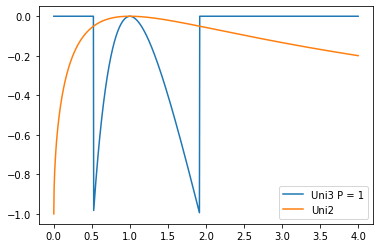

In [53]:
r = 0.003
n = 2
P= 1
pa = 0.9 #k=pa/P
pb = 1/pa #k=pa/P
c = np.zeros(2)
c[0] = np.sqrt(pa)
c[1] = 1/(np.sqrt(pb))
k = np.linspace(0, 4, 1000)
l = np.zeros(np.size(k))
m = np.zeros(np.size(k))
for i in range(np.size(k)):
    l[i] = IL_v3_fee_from3(r, 2, c, np.ones(2), k[i], 0, 1)
    m[i] = IL_fee_uni2(2, k[i], r)
plt.plot(k,l, label = 'Uni3 P = %s'%P)
plt.plot(k, m, label = 'Uni2')
plt.legend()
plt.show()

### Balancer without fee ###

$\prod\limits_{i=1}^{n} x_i^{w_i} = L$

$\sum\limits_{i=1} w_i = 1$

$i <-> j, i < j$

$*) P'_{x_ix_j} = P_{x_ix_j}k = \frac{kw_jx_i}{w_ix_j}$

$V_1 = x'_1 + \sum\limits_{l = 2}^{n} x'_lP'_{x_1x_l} = x'_1 + \sum\limits_{l = 2, l \neq i,j}^{n} x_lP_{x_1x_l} + x'_jP'_{x_1x_j} + x'_iP'_{x_1x_i}$

$V_1 = \frac{x_1}{w_1}$

$V_{held} = x_1 + \sum\limits_{l = 2}^{n} x_lP'_{x_1x_l} = x_1 + \sum\limits_{l = 2, l \neq i,j}^{n} x_lP_{x_1x_l} + x_jP'_{x_1x_j} + x_iP'_{x_1x_i}$

$x'_i = lx_i$

$x'_j = mx_j$

**) $\prod\limits_{l=1}^{n} x_l^{w_l} = x_j^{'w_j}x_i^{'w_i} \prod\limits_{l=1, l \neq i, j}^{n} x_l^{w_l}$

$Eq 1 from **): m^{w_j}l^{w_i} = 1$

$Eq 2 from *): l = mk $

$m^{w_i + w_j} = k^{-w_i}, m = k^{\frac{-w_i}{w_i + w_j}}$

$l = k^{\frac{w_j}{w_i + w_j}}$

$IL(k, w_1, ..., w_n) = \frac{k^{\frac{w_j}{w_i + w_j}}}{\sum\limits_{l = 1, l\neq i, j}^{n} w_lk^{\frac{w_j}{w_i + w_j}} + w_i + w_jk} - 1$


$i=1 <--> j$ - the same formula


In [54]:
#i < j
def balancer(n, w, k, i, j):
    t = w[j]/(w[j]+w[i])
    b = 0
    for l in range(n):
        if (l != i)&(l != j):
            b += w[l]*k**t
    return (k**t)/(b + w[i] + w[j]*k) - 1

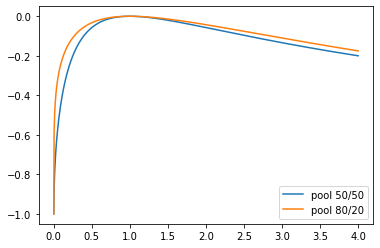

In [55]:
n = 2
k = np.linspace(0, 4, 1000)
w = np.zeros(n)

delta = 0.3
num = 2

w[0] = 0.5
w[1] = 1 - w[0]

for i in range(num):
    plt.plot(k, balancer(n, w, k, 0, 1), label = 'pool %s/%s'%(round(w[0]*100), round(w[1]*100)))
    w[0] = w[0] + delta
    w[1] = 1 - w[0]

plt.legend()
plt.show()

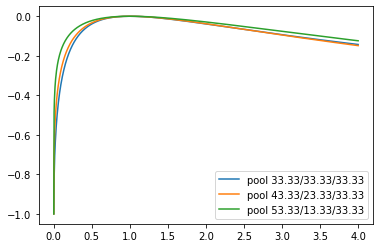

In [34]:
n = 3
k = np.linspace(0, 4, 1000)
w = np.zeros(n)

delta = 0.1
num = 3

w[0] = 1./n
w[1] = 1./n
w[2] = 1 - w[0] - w[1]

for i in range(num):
    plt.plot(k, balancer(n, w, k, 0, 1), label = 'pool %s/%s/%s'%(round(100*w[0], 2), round(100*w[1], 2), round(100*w[2], 2)))
    w[0] += delta
    w[1] -= delta
    w[2] = 1 - w[0] - w[1]
    plt.legend()
plt.show()

### Balancer with fee ###

$i <-> j, i < j$

$x''_i = x'_i - (x'_i - x_i)\rho) = lx_i, l > 1$

$x'_j = mx_j$

$m^{w_i + w_j} = k^{-w_i}, m = k^{\frac{-w_i}{w_i + w_j}}$

$l = k^{\frac{w_j}{w_i + w_j}}$

$V_1 = x'_1 + \sum\limits_{l = 2}^{n} x'_lP'_{x_1x_l} = x_1 + \sum\limits_{l = 2, l \neq i,j}^{n} x_lP_{x_1x_l} + x'_jP'_{x_1x_j} + \frac{(x''_i - x_i\rho)}{1-\rho}P'_{x_1x_i}$

$V_1 = x_1(1 + \sum\limits_{l = 2, l \neq i}^{n} \frac{w_l}{w_1}) + \frac{x_1w_i}{w_1(1-\rho)} - \frac{x_1w_i\rho}{w_1l(1-\rho)}$


$V_1 = x_1(\frac{1 - w_i}{w_1}) + \frac{x_1w_i}{w_1}(\frac{l-\rho}{l(1-\rho)})$

$V_1 = \frac{x_1}{w_1}(\frac{(1 - w_i)l(1-\rho) + w_i(l-\rho)}{l(1-\rho)})$

$V_1 = \frac{x_1}{w_1}(\frac{ l(1 - \rho + w_i\rho) - w_i\rho}{l(1-\rho)})$

$V_{held} = x_1 + \sum\limits_{l = 2}^{n} x_lP'_{x_1x_l} = x_1 + \sum\limits_{l = 2, l \neq i,j}^{n} x_lP_{x_1x_l} + x_jP'_{x_1x_j} + x_iP'_{x_1x_i}$

$V_{held} = x_1 + \sum\limits_{l = 2}^{n} x_lP'_{x_1x_l} = x_1(1 + \sum\limits_{l = 2, l \neq i,j}^{n} \frac{w_l}{w_1}) + x_1\frac{w_j}{mw_1} + x_1\frac{w_i}{lw_1}$

$IL(k, w_1, ..., w_n) = \frac{l(1 - \rho + w_i\rho) - w_i\rho}{(1-\rho)(\sum\limits_{l = 1, l \neq i,j}^{n} lw_l + \frac{lw_j}{m} + w_i)} - 1$

$IL(k, w_1, ..., w_n) = \frac{k^{\frac{w_j}{w_i + w_j}}(1 - \rho + w_i\rho) - w_i\rho}{(1-\rho)(\sum\limits_{l = 1, l \neq i,j}^{n} w_lk^{\frac{w_j}{w_i + w_j}} + w_jk + w_i)} - 1, k > 1$

$x''_j = x'_j - (x'_j - x_j)\rho = mx_j$

$V_1 = \frac{x_1}{w_1}(\frac{ m(1 - \rho + w_j\rho) - w_j\rho}{m(1-\rho)})$

$IL(k, \rho, w_1, ..., w_n) = \frac{m(1 - \rho + w_j\rho) - w_j\rho}{(1-\rho)(\sum\limits_{l = 1, l \neq i,j}^{n} mw_l + w_j + w_i\frac{m}{l})} - 1$

$IL(k, \rho, w_1, ..., w_n) = \frac{k^{\frac{w_j}{w_i + w_j}}(1 - \rho + w_j\rho) - kw_j\rho}{(1-\rho)(\sum\limits_{l = 1, l \neq i,j}^{n} k^{\frac{w_j}{w_i + w_j}}w_l + w_jk + w_i)} - 1, k < 1$

$1 <-> j$

$x''_1 = x'_1 - (x'_1 - x_1)\rho = lx_1$

$V_1 = x''_1\sum\limits_{l = 2}^{n} \frac{w_l}{w_1} + \frac{x''_1 - x_1\rho}{1-\rho}$

$V_1 = x''_1\frac{1 - w_1}{w_1} + \frac{x''_1 }{1-\rho} - \frac{x_1\rho}{1-\rho}$

$V_1 = x_1\frac{l(1-\rho + w_1\rho) - w_1\rho}{w_1(1-\rho)}$

$V_{held} = x_1(1 + \sum\limits_{l = 2, l \neq j}^{n} \frac{lw_l}{w_1} + \frac{kw_j}{w_1})$

$IL(k, \rho, w_1, ..., w_n) = \frac{k^{\frac{w_j}{w_1 + w_j}}(1-\rho + w_1\rho) - w_1\rho}{(1-\rho)(w_1 + \sum\limits_{l = 2, l \neq j}^{n} k^{\frac{w_j}{w_1 + w_j}}w_l + kw_j)}, k > 1$

$IL(k, \rho, w_1, ..., w_n) = \frac{k^{\frac{w_j}{w_1 + w_j}}(1-\rho + w_1\rho) - kw_1\rho}{(1-\rho)(w_1 + \sum\limits_{l = 2, l \neq j}^{n} k^{\frac{w_j}{w_1 + w_j}}w_l + kw_j)}, k < 1$

In [56]:
#r - n-dim for future
#i < j
def balancer_fee(n, w, k, r, i, j):
    #t = w[j]/(w[j]+w[i])
    t = w[1]
    #a = (k**t)*(1 - r + w[i]*r) - w[i]*r*bool(k>=1) - w[i]*r*k*bool(k<1)
    a = (k**t)*(w[0] + w[1]*(1-r)) - w[0]*r*bool(k>=1) - w[0]*r*k*bool(k<1)
    b = 0
    for l in range(n):
        if (l != i )&(l != j):
            b+= (k**t)*w[l]
    #b += w[i] + k*w[j]
    b += w[0] + k*w[1]
    b *= (1-r)
    
    return a/b - 1

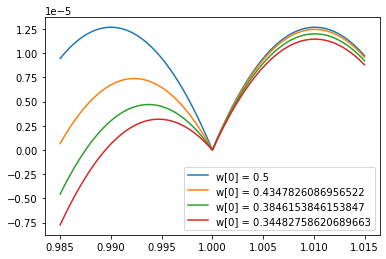

In [57]:
n = 2
w = np.zeros(n)
k = np.linspace(0.985, 1.015, 1000)
l = 2
delta = 0.3
num = 4
r = 0.01
w[0] = 1./l
w[1] = 1 - w[0]
for i in range(num):
    m = np.zeros(np.size(k))
    for p in range(np.size(k)):
        m[p] = balancer_fee(n, w, k[p], r, 0, 1)
    plt.plot(k, m, label = 'w[0] = %s'%w[0])
    l+=delta
    w[0] = 1./l
    w[1] = 1 - w[0]
    plt.legend()
plt.show()

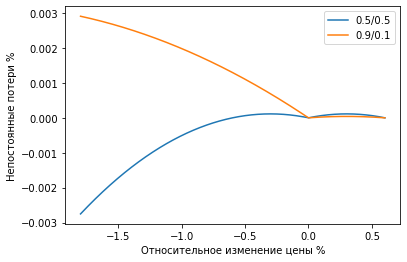

In [58]:
n = 2
w = np.zeros(n)
k = np.linspace(1-(0.75/0.25)*(1-(0.997)**2), 1+ (1./((0.997)**2)-1), 1000)
l = 0.4
delta = 0.25
num = 2
r = 0.003
w[0] = 0.5
w[1] = 1 - w[0]
for i in range(num):
    m = np.zeros(np.size(k))
    for p in range(np.size(k)):
        m[p] = balancer_fee(n, w, k[p], r, 0, 1)
    plt.plot((k-1)*100, m*100, label = '%s/%s'%(round(w[0], 3), round(w[1], 3)))
    
    w[0] +=l
    w[1] = 1 - w[0]
    plt.legend()
plt.xlabel('Относительное изменение цены %')
plt.ylabel('Непостоянные потери %')
plt.show()

In [60]:
num = 10000
pa = 0.8 #c1^2
pb = 1/pa #1/c2^2
L = 1000
xxx= np.linspace(0, L*np.sqrt(pb) - L*np.sqrt(pa), num)
xxxvirt = np.zeros(num)
yyyvirt = np.zeros(num)
xxxvirt[0] = xxx[0] + L*np.sqrt(pa)
yyy= np.zeros(num)
yyy[0] = L**2/(xxxvirt[0]) - (L/np.sqrt(pb))
ppp = np.zeros(num)
yyyvirt[0] = yyy[0] + L/np.sqrt(pb)
ppp[0] = xxxvirt[0]/yyyvirt[0]


for i in range(1, num):
    xxxvirt[i] = xxx[i] + L*np.sqrt(pa)
    yyyvirt[i] = L**2/(xxxvirt[i])
    yyy[i] = yyyvirt[i] - (L/np.sqrt(pb))
    ppp[i] = xxxvirt[i]/yyyvirt[i]

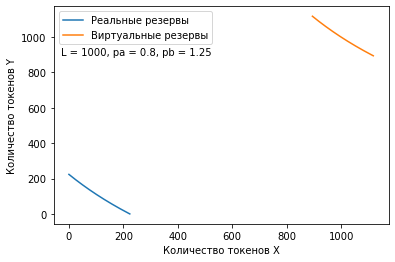

In [61]:
plt.plot(xxx, yyy, label = 'Реальные резервы')
plt.plot(xxxvirt, yyyvirt, label = 'Виртуальные резервы')
plt.xlabel('Количество токенов X')
plt.ylabel('Количество токенов Y')
plt.text(-30, 900, 'L = %s, pa = %s, pb = %s'%(L, pa, pb))
plt.legend()
plt.show()

Text(0, 0.5, '$P_{xy}$')

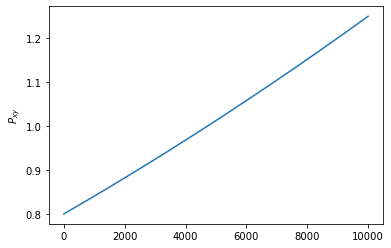

In [62]:
plt.plot(ppp)
plt.ylabel('$P_{xy}$')

In [63]:
import pandas as pd
df = pd.read_csv('EIl_vol.csv', 'r')

In [64]:
t = np.array(df['eil']) 

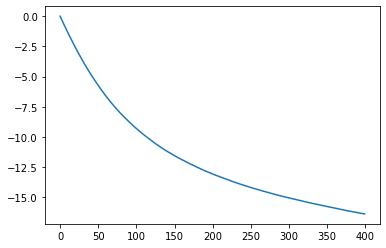

In [65]:
plt.plot(range(400), t*100)